<a href="https://colab.research.google.com/github/Dana1402/NeuralNetworksScripts/blob/main/1_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo update-alternatives --config python3

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.7   2         auto mode
  1            /usr/bin/python3.6   1         manual mode
  2            /usr/bin/python3.7   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 1
update-alternatives: using /usr/bin/python3.6 to provide /usr/bin/python3 (python3) in manual mode


In [ ]:
!python3 --version

Python 3.6.9


In [ ]:
# !pip install tensorflow==1.15.5
import tensorflow as tf
print(tf.__version__)

1.15.5


In [ ]:
# pip install tf_slim

In [ ]:
# !pip install pycocotools

In [ ]:
# pip install lvis

In [ ]:
# !pip install ipykernel

In [ ]:
# !pip install scipy

In [ ]:
# pip install tensorflow.io

In [ ]:
# pip install tf-models-official

In [ ]:
# !sudo apt-get install python3-pip

In [ ]:
# !python -m pip install --upgrade pip

In [ ]:
# !pip3 install absl-py

In [ ]:
# !pip install --upgrade google-api-python-client

Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Creating working directory

In [ ]:
%cd "/content/drive/My Drive/tf_od_demo"

/content/drive/My Drive/tf_od_demo


Istalling object detection library

In [ ]:
if False:
  
    !git clone https://github.com/tensorflow/models
    !cd models/research && protoc object_detection/protos/*.proto --python_out=.
    !cd models/research && export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim && python object_detection/builders/model_builder_test.py

In [ ]:
# pip install tensorflow-object-detection-api

In [ ]:
import pandas as pd
import os
from PIL import Image

import tensorflow as tf

import sys
sys.path.insert(0, 'models/research')

from object_detection.utils import dataset_util
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [ ]:
def create_tf_example(example):
  
    img_fpath = os.path.join('my_dataset_car', example.id)
    img = Image.open(img_fpath)
    height = img.size[1]
    width = img.size[0]
    filename = str.encode(example.id)
    with open(img_fpath, mode='rb') as f:
        encoded_image_data = f.read()
    image_format = b'jpeg'

    # List of normalized left x coordinates in bounding box (1 per box)
    xmins = [example.xmin / float(width)] 
    # List of normalized right x coordinates in bounding box # (1 per box)
    xmaxs = [example.xmax / float(width)] 
    # List of normalized top y coordinates in bounding box (1 per box)
    ymins = [example.ymin / float(height)] 
    # List of normalized bottom y coordinates in bounding box # (1 per box)
    ymaxs = [example.ymax / float(height)] 
    # List of string class name of bounding box (1 per box)
    classes_text = [b'Car']
    # List of integer class id of bounding box (1 per box)
    classes = [1]

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_image_data),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

In [ ]:
annot = pd.read_csv('/content/drive/MyDrive/tf_od_demo/my_dataset_car/annot.csv')
annot.head()

,id,xmin,ymin,xmax,ymax
0,1.jpg,238,311,425,456
1,2.jpg,296,290,489,453
2,3.jpg,245,251,443,446
3,4.jpg,208,270,368,470
4,5.jpg,206,312,277,435


Создание TFRecord

In [ ]:
writer = tf.io.TFRecordWriter('/content/drive/MyDrive/tf_od_demo/my_dataset_car/train_data.record')

In [ ]:
for idx, row in annot.iterrows():
    tf_example = create_tf_example(row)
    writer.write(tf_example.SerializeToString())

writer.close()

Dowloading prelearned model

In [ ]:
if False:
    !wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2018_01_28.tar.gz
    !tar -xzf ssd_mobilenet_v1_coco_2018_01_28.tar.gz

Start learning our model

In [ ]:
# pip uninstall opencv-python-headless==4.5.5.64

In [ ]:
# pip install opencv-python-headless==4.1.2.30

In [ ]:
# !pip install tensorflow==1.15.5 --ignore-installed

In [ ]:
%%time

if True:
    # Delete output directory
    !rm -rf my_dataset_car/output

!export PYTHONPATH=$PYTHONPATH:models/research:models/research/slim ; python models/research/object_detection/model_main.py \
    --pipeline_config_path=my_dataset_car/pipeline.config \
    --model_dir=my_dataset_car/output \
    --num_train_steps=10000 \
    --alsologtostderr

W0714 11:49:48.863231 139725530539904 model_lib.py:839] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: 10000
I0714 11:49:48.863605 139725530539904 config_util.py:552] Maybe overwriting train_steps: 10000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0714 11:49:48.863770 139725530539904 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0714 11:49:48.863861 139725530539904 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0714 11:49:48.863932 139725530539904 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0714 11:49:48.864043 139725530539904 model_lib.py:855] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
INFO:tensorflow:create_estimator_and_inputs: use_tpu False, export_to

Freezing model

In [ ]:
!export PYTHONPATH=$PYTHONPATH:models/research:models/research/slim ; python models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=my_dataset_car/pipeline.config \
    --trained_checkpoint_prefix=my_dataset_car/output/model.ckpt-10000 \
    --output_directory=my_dataset_car/output/frozen/

Instructions for updating:
Please use `layer.__call__` method instead.
W0714 18:26:14.209609 139626675971968 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0714 18:26:16.117437 139626675971968 convolutional_box_predictor.py:155] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0714 18:26:16.168650 139626675971968 convolutional_box_predictor.py:155] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0714 18:26:16.216203 139626675971968 convolutional_box_predictor.py:155] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv befo

**Testing model**

Uploading name of classes and their IDs

In [ ]:
PATH_TO_LABELS = 'my_dataset_car/car_label_map.pbtxt'

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

Uploading Freezing model

In [ ]:
PATH_TO_FROZEN_GRAPH = 'my_dataset_car/output/frozen/frozen_inference_graph.pb'

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [ ]:
def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[1], image.shape[2])
                detection_masks_reframed = tf.cast(tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict, feed_dict={image_tensor: image})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[ 'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict

In [ ]:
import imageio
import numpy as np
from matplotlib import pyplot as plt
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [ ]:
image_np = imageio.imread('/content/drive/MyDrive/tf_od_demo/my_dataset_car/test.jpg')
image_np_expanded = np.expand_dims(image_np, axis=0)

output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)

In [ ]:
output_dict

{'detection_boxes': array([[0.33550733, 0.30670318, 0.54028857, 0.5581999 ],
        [0.08692476, 0.4462756 , 0.8754171 , 1.        ],
        [0.        , 0.45861334, 0.5741602 , 1.        ],
        [0.13748634, 0.        , 0.8998519 , 0.43368757],
        [0.22463006, 0.46782514, 1.        , 1.        ],
        [0.408783  , 0.1466721 , 1.        , 0.859113  ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.      

Visualization

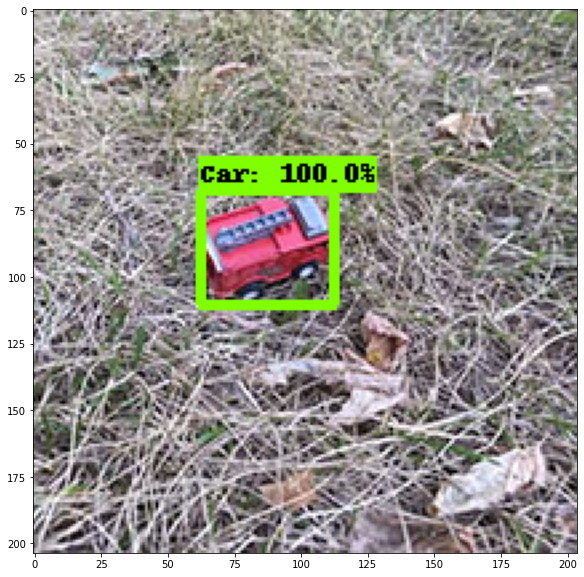

In [ ]:
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks'),
    use_normalized_coordinates=True,
    line_thickness=4,
    min_score_thresh=0.9)

%matplotlib inline
plt.figure(figsize=(10,10))
plt.imshow(image_np)